In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import time

from scipy import stats, integrate
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import reciprocal, uniform

import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def checkmetrics(pred, labels_test, name):
    sns.set()
    print('The accuracy of ', name, 'is: ', accuracy_score(pred, labels_test))
    matrix = confusion_matrix(labels_test, pred)
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    print(ax)
    print(classification_report(pred, labels_test))

There are six (6) classes of target variable

* LAYING
* SITTING 
* STANDING
* WALKING
* WALKING_DOWNSTAIRS
* WALKING_UPSTAIRS

In [3]:
num_classes = 6

In [4]:
train_df = pd.read_csv("data/human-activity-recognition-with-smartphones/train.csv")
test_df = pd.read_csv("data/human-activity-recognition-with-smartphones/test.csv")

In [5]:
shape = train_df.shape
print("Training Dataset")
print("================")
print("Columns:", shape[1])
print("Rows   :", shape[0])

Training Dataset
Columns: 563
Rows   : 7352


In [6]:
shape = test_df.shape
print("Test Dataset")
print("================")
print("Columns:", shape[1])
print("Rows   :", shape[0])

Test Dataset
Columns: 563
Rows   : 2947


In [7]:
train_df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
### Extract features and labels from dataset for local testing:
target_train_df = train_df.filter(items=["Activity"])
target_test_df = test_df.filter(items=["Activity"])

target_train_df['Activity'] = pd.Categorical(target_train_df.Activity)
target_test_df['Activity'] = pd.Categorical(target_test_df.Activity)

target_train_cat_df = target_train_df.copy()
target_test_cat_df = target_test_df.copy()

target_train_cat_df['Code'] = target_train_cat_df['Activity'].cat.codes
target_test_cat_df['Code'] = target_test_cat_df['Activity'].cat.codes

features_train_df = train_df.drop("Activity", axis=1)
features_test_df = test_df.drop("Activity", axis=1)

target_train_cat_df = target_train_cat_df.drop("Activity", axis=1)
target_test_cat_df = target_test_cat_df.drop("Activity", axis=1)

features_train = features_train_df.as_matrix()
features_test = features_test_df.as_matrix()

target_test = target_test_df.as_matrix().ravel()
target_train = target_train_df.as_matrix().ravel()

target_train_cat = target_train_cat_df.as_matrix().ravel()
target_test_cat = target_test_cat_df.as_matrix().ravel()

In [9]:
train_processed_df = pd.concat([features_train_df, target_train_df, target_train_cat_df], axis=1)
train_processed_df.to_csv("data/train_processed.csv")

test_processed_df = pd.concat([features_test_df, target_test_df, target_test_cat_df], axis=1)
test_processed_df.to_csv("data/test_processed.csv")

In [10]:
shape = features_train.shape
print("Training Dataset")
print("================")
print("No. of features:", shape[1])

Training Dataset
No. of features: 562


# Baseline Approach

## C-Support Vector Classification

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.9s finished


The train score: 0.957970620239 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.930777061418
Axes(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.90      0.88       466
          STANDING       0.92      0.88      0.90       555
           WALKING       1.00      0.90      0.94       550
WALKING_DOWNSTAIRS       0.85      0.99      0.92       362
  WALKING_UPSTAIRS       0.95      0.94      0.94       477

       avg / total       0.93      0.93      0.93      2947

Running for 51.99508309364319 seconds


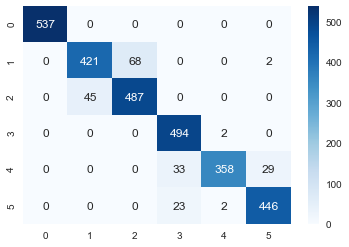

In [13]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.9s finished


The train score: 0.994695321001 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.963352561927
Axes(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       539
           SITTING       0.85      0.98      0.91       426
          STANDING       0.98      0.89      0.93       589
           WALKING       1.00      0.96      0.98       516
WALKING_DOWNSTAIRS       0.98      1.00      0.99       413
  WALKING_UPSTAIRS       0.96      0.98      0.97       464

       avg / total       0.97      0.96      0.96      2947

Running for 10.172034740447998 seconds


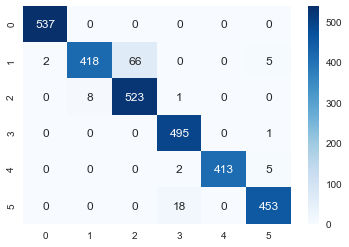

In [14]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.6s finished


The train score: 0.9503536452665942 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.9205972175093315
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.87      0.92      0.89       467
          STANDING       0.92      0.89      0.91       552
           WALKING       1.00      0.86      0.92       574
WALKING_DOWNSTAIRS       0.75      0.99      0.86       321
  WALKING_UPSTAIRS       0.95      0.90      0.92       497

       avg / total       0.93      0.92      0.92      2947

Running for 104.576180934906 seconds


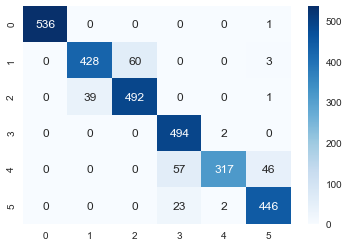

In [22]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

# Feature Selection using XGBoost Feature Importance

In [13]:
import xgboost as xgb
import operator

start_time = time.time()

xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1,
    'num_class': num_classes
}

dtrain = xgb.DMatrix(features_train_df, target_train_cat_df)
dtest = xgb.DMatrix(features_test_df, target_test_cat_df)

num_boost_rounds = 250

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# train model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_rounds, watchlist)

print("Running for %s seconds" % (time.time() - start_time))

[0]	train-mlogloss:1.6946	test-mlogloss:1.70898
[1]	train-mlogloss:1.60721	test-mlogloss:1.6351
[2]	train-mlogloss:1.5274	test-mlogloss:1.56671
[3]	train-mlogloss:1.45462	test-mlogloss:1.50424
[4]	train-mlogloss:1.38701	test-mlogloss:1.4465
[5]	train-mlogloss:1.32439	test-mlogloss:1.39337
[6]	train-mlogloss:1.26603	test-mlogloss:1.34342
[7]	train-mlogloss:1.21157	test-mlogloss:1.29542
[8]	train-mlogloss:1.16042	test-mlogloss:1.25132
[9]	train-mlogloss:1.11231	test-mlogloss:1.20931
[10]	train-mlogloss:1.0674	test-mlogloss:1.16904
[11]	train-mlogloss:1.02508	test-mlogloss:1.13162
[12]	train-mlogloss:0.984676	test-mlogloss:1.09599
[13]	train-mlogloss:0.946549	test-mlogloss:1.06251
[14]	train-mlogloss:0.910005	test-mlogloss:1.03123
[15]	train-mlogloss:0.875612	test-mlogloss:1.00159
[16]	train-mlogloss:0.84312	test-mlogloss:0.972506
[17]	train-mlogloss:0.812368	test-mlogloss:0.945535
[18]	train-mlogloss:0.782585	test-mlogloss:0.919452
[19]	train-mlogloss:0.754433	test-mlogloss:0.894029
[20]

[159]	train-mlogloss:0.021675	test-mlogloss:0.194296
[160]	train-mlogloss:0.02129	test-mlogloss:0.193981
[161]	train-mlogloss:0.020886	test-mlogloss:0.193487
[162]	train-mlogloss:0.020498	test-mlogloss:0.192806
[163]	train-mlogloss:0.020157	test-mlogloss:0.192378
[164]	train-mlogloss:0.019856	test-mlogloss:0.191821
[165]	train-mlogloss:0.019555	test-mlogloss:0.191075
[166]	train-mlogloss:0.019209	test-mlogloss:0.190307
[167]	train-mlogloss:0.018903	test-mlogloss:0.189552
[168]	train-mlogloss:0.01859	test-mlogloss:0.189362
[169]	train-mlogloss:0.018288	test-mlogloss:0.188467
[170]	train-mlogloss:0.018011	test-mlogloss:0.18789
[171]	train-mlogloss:0.017726	test-mlogloss:0.187349
[172]	train-mlogloss:0.017427	test-mlogloss:0.186822
[173]	train-mlogloss:0.017123	test-mlogloss:0.186072
[174]	train-mlogloss:0.016871	test-mlogloss:0.185515
[175]	train-mlogloss:0.016601	test-mlogloss:0.185107
[176]	train-mlogloss:0.016324	test-mlogloss:0.184933
[177]	train-mlogloss:0.016077	test-mlogloss:0.184

Running for 0.9582531452178955 seconds


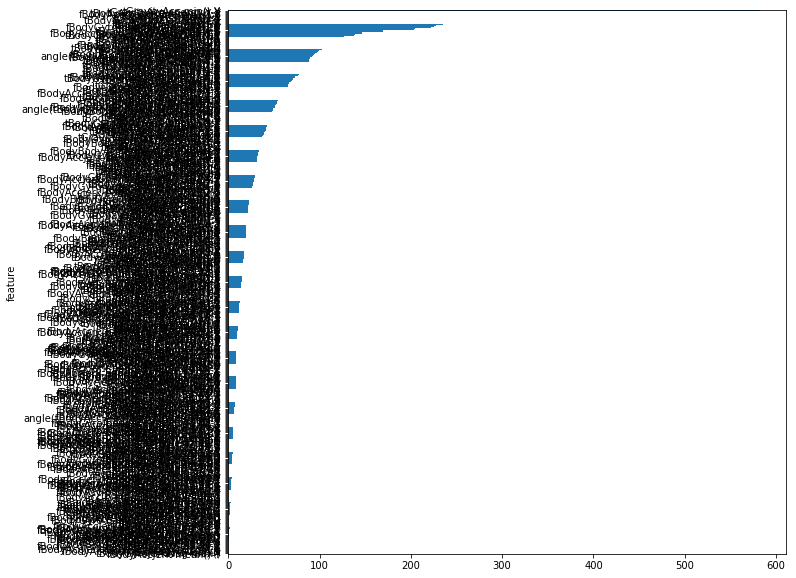

In [14]:
start_time = time.time()

importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

importance_df = pd.DataFrame(importance, columns=['feature', 'fscore'])

# Plot Feature Importance
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

print("Running for %s seconds" % (time.time() - start_time))

In [15]:
def feature_selection(dataframe, importance_scores_df, threshold=0.4):
    normalized_df = importance_scores_df.copy()
    normalized_df['fscore'] = (importance_scores_df['fscore'] - importance_scores_df['fscore'].min())/(importance_scores_df['fscore'].max()-importance_scores_df['fscore'].min())
    normalized_df = normalized_df[normalized_df['fscore'] >= threshold]
    new_dataframe = dataframe.filter(items=normalized_df['feature'].tolist())
    return new_dataframe

In [16]:
def top_features(importance_scores_df, top=20):
    df = importance_scores_df.sort_values(by=['fscore'], ascending=False)
    return df.head(top)

Running for 0.061318159103393555 seconds


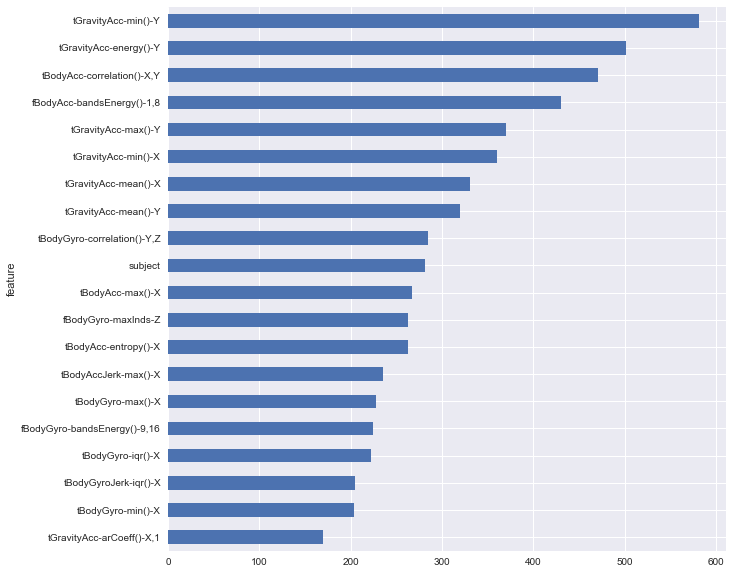

In [23]:
start_time = time.time()

top20_df = top_features(importance_df, top=20)
top20_df = top20_df.sort_values(by=['fscore'], ascending=True)

# Plot Feature Importance
plt.figure()
top20_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

print("Running for %s seconds" % (time.time() - start_time))

## Keep impotant features within 1 standard deviation

In [ ]:
# one standard deviation away from the best feature
threshold_1std = 1 - 0.6827

features_train_1std_df = feature_selection(features_train_df, importance_df, threshold=threshold_1std)
features_test_1std_df = feature_selection(features_test_df, importance_df, threshold=threshold_1std)

features_train_1std_df.to_csv("data/features_train_1std.csv", index=False)
features_test_1std_df.to_csv("data/features_test_1std.csv", index=False)

In [11]:
features_train_1std_df = pd.read_csv("data/features_train_1std.csv")
features_test_1std_df = pd.read_csv("data/features_test_1std.csv")

features_train_1std = features_train_1std_df.as_matrix()
features_test_1std = features_test_1std_df.as_matrix()

In [12]:
shape = features_train_1std.shape
print("Training Dataset (1 standard deviation)")
print("================")
print("No. of features:", shape[1])

Training Dataset (1 standard deviation)
No. of features: 19


## C-Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


The train score: 0.9488574537540805 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.833389888021717
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.74      0.89      0.81       409
          STANDING       0.91      0.79      0.85       613
           WALKING       0.90      0.71      0.79       627
WALKING_DOWNSTAIRS       0.75      0.85      0.80       372
  WALKING_UPSTAIRS       0.66      0.79      0.72       389

       avg / total       0.85      0.83      0.83      2947

Running for 2.7947771549224854 seconds


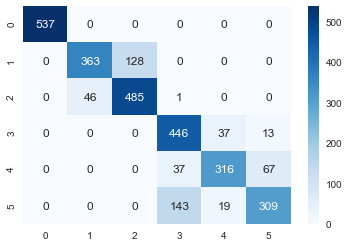

In [28]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_1std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


The train score: 0.9277747551686616 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.8815744825246012
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       525
           SITTING       0.77      0.88      0.82       429
          STANDING       0.90      0.81      0.85       592
           WALKING       0.92      0.89      0.91       513
WALKING_DOWNSTAIRS       0.86      0.89      0.88       405
  WALKING_UPSTAIRS       0.85      0.83      0.84       483

       avg / total       0.88      0.88      0.88      2947

Running for 2.6860768795013428 seconds


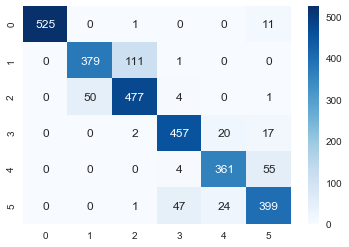

In [29]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_1std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


The train score: 0.9428726877040261 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.837461825585341
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.75      0.88      0.81       417
          STANDING       0.90      0.80      0.85       603
           WALKING       0.93      0.71      0.80       649
WALKING_DOWNSTAIRS       0.74      0.90      0.81       342
  WALKING_UPSTAIRS       0.66      0.78      0.72       399

       avg / total       0.85      0.84      0.84      2947

Running for 8.05686092376709 seconds


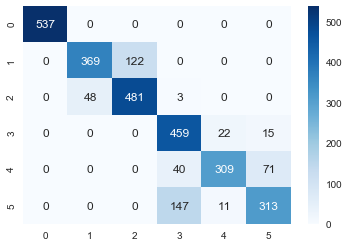

In [30]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_1std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Keep impotant features within 2 standard deviation

In [34]:
# two standard deviation away from the best feature
threshold_2std = 1 - 0.9545

features_train_2std_df = feature_selection(features_train_df, importance_df, threshold=threshold_2std)
features_test_2std_df = feature_selection(features_test_df, importance_df, threshold=threshold_2std)

features_train_2std_df.to_csv("data/features_train_2std.csv", index=False)
features_test_2std_df.to_csv("data/features_test_2std.csv", index=False)

In [13]:
features_train_2std_df = pd.read_csv("data/features_train_2std.csv")
features_test_2std_df = pd.read_csv("data/features_test_2std.csv")

features_train_2std = features_train_2std_df.as_matrix()
features_test_2std = features_test_2std_df.as_matrix()

In [14]:
shape = features_train_2std.shape
print("Training Dataset (2 standard deviation)")
print("================")
print("No. of features:", shape[1])

Training Dataset (2 standard deviation)
No. of features: 165


## C-Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished


The train score: 0.9766050054406964 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.9300984051577876
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.90      0.88       469
          STANDING       0.91      0.88      0.90       552
           WALKING       1.00      0.87      0.93       567
WALKING_DOWNSTAIRS       0.88      0.99      0.93       372
  WALKING_UPSTAIRS       0.92      0.96      0.94       450

       avg / total       0.93      0.93      0.93      2947

Running for 10.7046480178833 seconds


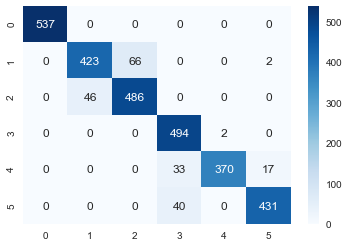

In [37]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


The train score: 0.9904787812840044 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.9565659993213438
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.96      0.91       438
          STANDING       0.97      0.89      0.93       580
           WALKING       0.99      0.94      0.97       521
WALKING_DOWNSTAIRS       0.98      0.99      0.98       415
  WALKING_UPSTAIRS       0.94      0.97      0.96       456

       avg / total       0.96      0.96      0.96      2947

Running for 3.695521116256714 seconds


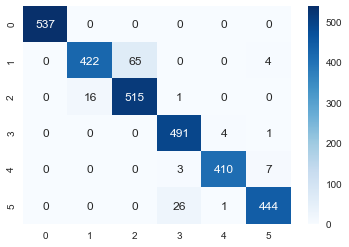

In [38]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished


The train score: 0.9616430903155604 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.9243298269426535
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.86      0.90      0.88       466
          STANDING       0.91      0.88      0.90       551
           WALKING       1.00      0.86      0.92       577
WALKING_DOWNSTAIRS       0.81      0.99      0.89       342
  WALKING_UPSTAIRS       0.95      0.94      0.95       475

       avg / total       0.93      0.92      0.92      2947

Running for 32.76602101325989 seconds


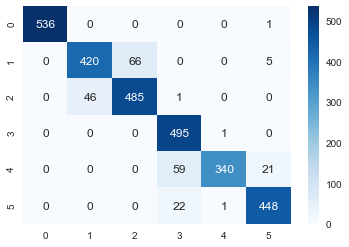

In [39]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Keep impotant features within 2.5 standard deviation

In [40]:
# three standard deviation away from the best feature
threshold_2_5std = 1 - 2 * (0.49379)

features_train_2_5std_df = feature_selection(features_train_df, importance_df, threshold=threshold_2_5std)
features_test_2_5std_df = feature_selection(features_test_df, importance_df, threshold=threshold_2_5std)

features_train_2_5std_df.to_csv("data/features_train_2_5std.csv", index=False)
features_test_2_5std_df.to_csv("data/features_test_2_5std.csv", index=False)

In [15]:
features_train_2_5std_df = pd.read_csv("data/features_train_2_5std.csv")
features_test_2_5std_df = pd.read_csv("data/features_test_2_5std.csv")

features_train_2_5std = features_train_2_5std_df.as_matrix()
features_test_2_5std = features_test_2_5std_df.as_matrix()

FileNotFoundError: File b'data/features_train_2_5std.csv' does not exist

In [16]:
shape = features_train_2_5std.shape
print("Training Dataset (2.5 standard deviation)")
print("================")
print("No. of features:", shape[1])

NameError: name 'features_train_2_5std' is not defined

## Keep impotant features within 3 standard deviation

In [43]:
# three standard deviation away from the best feature
threshold_3std = 1 - 0.9973

features_train_3std_df = feature_selection(features_train_df, importance_df, threshold=threshold_3std)
features_test_3std_df = feature_selection(features_test_df, importance_df, threshold=threshold_3std)

features_train_3std_df.to_csv("data/features_train_3std.csv", index=False)
features_test_3std_df.to_csv("data/features_test_3std.csv", index=False)

In [17]:
features_train_3std_df = pd.read_csv("data/features_train_3std.csv")
features_test_3std_df = pd.read_csv("data/features_test_3std.csv")

features_train_3std = features_train_3std_df.as_matrix()
features_test_3std = features_test_3std_df.as_matrix()

In [18]:
shape = features_train_3std.shape
print("Training Dataset (3 standard deviation)")
print("================")
print("No. of features:", shape[1])

Training Dataset (3 standard deviation)
No. of features: 473


## C-Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.3s finished


The train score: 0.9635473340587595 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.9341703427214116
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.91      0.89       470
          STANDING       0.92      0.89      0.90       551
           WALKING       1.00      0.90      0.94       551
WALKING_DOWNSTAIRS       0.85      0.99      0.92       362
  WALKING_UPSTAIRS       0.95      0.94      0.95       476

       avg / total       0.94      0.93      0.93      2947

Running for 33.396018981933594 seconds


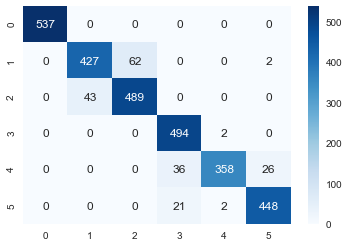

In [46]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished


The train score: 0.9938792165397171 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.9633525619273838
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       539
           SITTING       0.85      0.98      0.91       428
          STANDING       0.98      0.89      0.93       588
           WALKING       1.00      0.96      0.98       517
WALKING_DOWNSTAIRS       0.98      1.00      0.99       412
  WALKING_UPSTAIRS       0.97      0.98      0.97       463

       avg / total       0.97      0.96      0.96      2947

Running for 7.4900500774383545 seconds


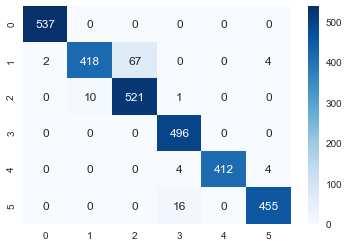

In [47]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.8s finished


The train score: 0.9533460282916213 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.9202578893790295
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.86      0.91      0.89       463
          STANDING       0.92      0.88      0.90       556
           WALKING       1.00      0.86      0.92       573
WALKING_DOWNSTAIRS       0.76      0.99      0.86       325
  WALKING_UPSTAIRS       0.95      0.90      0.93       494

       avg / total       0.93      0.92      0.92      2947

Running for 87.53779006004333 seconds


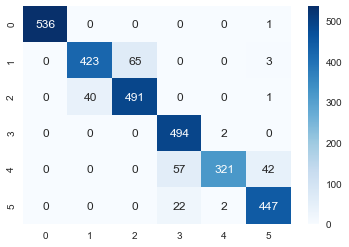

In [48]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

# Hyperparameters Tuning

## Grid Search Cross Validation

### C-Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.4s finished


The train score: 0.955658324265506 with parameters: {'gamma': 0.01, 'C': 10.0}
The accuracy of  C-Support Vector Classification is:  0.8656260604004072
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.82      0.89      0.86       453
          STANDING       0.91      0.85      0.88       569
           WALKING       0.90      0.76      0.82       583
WALKING_DOWNSTAIRS       0.80      0.88      0.84       381
  WALKING_UPSTAIRS       0.73      0.82      0.77       424

       avg / total       0.87      0.87      0.87      2947

Running for 18.11909031867981 seconds


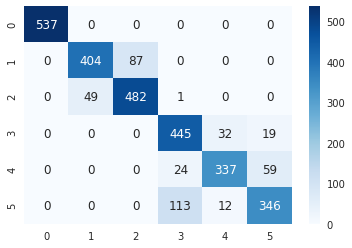

In [28]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

SVM = svm.SVC()

parameters = {
#    "kernel": "linear",
    'C': uniform(0.1,10), 
    'gamma': np.logspace(-3, 1, 6),
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_1std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_1std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_1std)

# parameters ={
# #    'C': [0.1,0.5,1.0,2.0, 3.0, 5.0, 7.5],
# #    'kernel': ['linear','poly','rbf'],
# #    'degree': [2,3,4,5,6],
# #    'gamma': [1e-3,'auto'],
# #    'tol' : [1e-4],
# #    'decision_function_shape' : ['ovo','ovr'],
# }

# grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
# grid_search_cv.fit(features_train_1std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.6s finished


The train score: 0.9258705114254625 with parameters: {'C': 2.424209586329018}
The accuracy of  Linear Support Vector Classification is:  0.8727519511367492
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       0.97      1.00      0.99       522
           SITTING       0.76      0.89      0.82       417
          STANDING       0.90      0.80      0.85       598
           WALKING       0.93      0.88      0.90       525
WALKING_DOWNSTAIRS       0.80      0.91      0.85       369
  WALKING_UPSTAIRS       0.85      0.78      0.81       516

       avg / total       0.88      0.87      0.87      2947

Running for 9.379687070846558 seconds


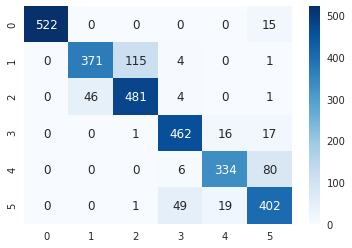

In [36]:
start_time = time.time()


SVM = LinearSVC()

parameters = {
#    "kernel": "linear",
     'C': uniform(0.1, 10) 
#    'gamma': np.logspace(-3, 2, 6),
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_1std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_1std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_1std)

# parameters ={
#     'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#     'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#     'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
#     'tol' : [1e-5,1e-4,1e-3],
#     'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
#     'multi_class'  : ['ovr','crammer_singer'],
#     'random_state' : [42],
#     'tol' : [1e-4],
#     'max_iter' : [1000],
# }

# grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
# grid_search_cv.fit(features_train_1std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Nu-Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.3s finished


The train score: 0.8588139281828074 with parameters: {'gamma': 0.01, 'nu': 0.04096311354099913}
The accuracy of  Nu-Support Vector Classification is:  0.7709535120461486
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.69      0.58      0.63       589
          STANDING       0.53      0.65      0.58       433
           WALKING       0.91      0.75      0.82       601
WALKING_DOWNSTAIRS       0.79      0.86      0.82       386
  WALKING_UPSTAIRS       0.70      0.82      0.75       401

       avg / total       0.78      0.77      0.77      2947

Running for 15.73972749710083 seconds


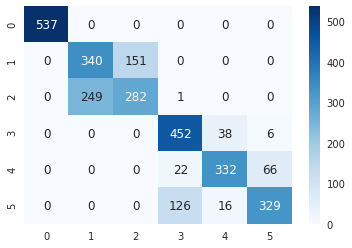

In [38]:
start_time = time.time()
 
SVM = NuSVC()


parameters = {
#    "kernel": "linear",
    'nu': uniform(0.001, 0.1), 
    'gamma': np.logspace(-3, 2, 6),
}


rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_1std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_1std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_1std)

# # defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
# parameters = {
#     'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
#     'kernel': ['linear','poly','rbf'],
#     'degree': [2,3,4,5,6],
#     'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
#     'tol' : [1e-4],
#     'decision_function_shape' : ['ovo','ovr'],

# }
# SVM = NuSVC()
# grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True,verbose=1)
# grid_search_cv.fit(features_train_1std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### C-Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 23.3min finished


The train score: 0.9877584330794341 with parameters: {'C': 0.5, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.001, 'kernel': 'linear', 'tol': 0.0001}
The accuracy of  C-Support Vector Classification is:  0.9497794367153037
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.95      0.91       451
          STANDING       0.96      0.90      0.93       570
           WALKING       0.98      0.94      0.96       517
WALKING_DOWNSTAIRS       0.95      0.95      0.95       418
  WALKING_UPSTAIRS       0.93      0.96      0.95       454

       avg / total       0.95      0.95      0.95      2947

Running for 1398.6609139442444 seconds


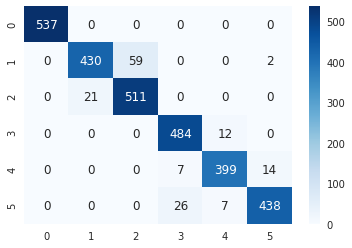

In [23]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

SVM = svm.SVC()

# parameters = {
#     
#     "C": uniform(1, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_2std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_2std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_2std)

parameters ={
         'C': [0.1,0.5,1.0,2.0, 3.0, 5.0, 7.5],
         'kernel': ['linear','poly','rbf'],
         'degree': [2,3,4,5,6],
         'gamma': [1e-4,1e-3,1e-2,1e-1,'auto'],
         'tol' : [1e-4],
         'decision_function_shape' : ['ovo','ovr'],
}
grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf = pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear-Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    9.6s finished


The train score: 0.990342763874 with parameters: {'C': 0.5, 'max_iter': 1000, 'tol': 0.001}
The accuracy of  Linear Support Vector Classification is:  0.956905327452
Axes(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.96      0.91       442
          STANDING       0.96      0.89      0.92       576
           WALKING       1.00      0.94      0.97       525
WALKING_DOWNSTAIRS       0.97      1.00      0.98       411
  WALKING_UPSTAIRS       0.94      0.98      0.96       456

       avg / total       0.96      0.96      0.96      2947

Running for 11.817811250686646 seconds


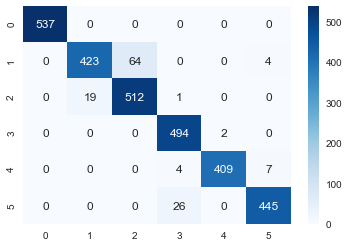

In [19]:
start_time = time.time()

SVM = LinearSVC()

# parameters = {
#     "C": uniform(0.01, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

parameters ={
#    'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#    'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#    'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
    'C': [0.5,0.8,1.0,2.0,5.0,10.0,15.0],
#    'multi_class'  : ['ovr','crammer_singer'],
#    'random_state' : [42],
    'tol' : [1e-3],
    'max_iter' : [1000],
}

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf = pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

In [ ]:
start_time = time.time()

SVM = NuSVC()

parameters = {
    "nu": uniform(0.001, 0.1)
    kernel': ['linear','poly','rbf']
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_3std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
# parameters = {
#     'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
#     'kernel': ['linear','poly','rbf'],
#     'degree': [2,3,4,5,6],
#     'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
#     'tol' : [1e-4],
#     'decision_function_shape' : ['ovo','ovr'],

# }

# grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
# grid_search_cv.fit(features_train_3std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## XGBoost 3 sd Hyperparameters tuning section

### C-Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


The train score: 0.9776931447225244 with parameters: {'C': 4.973223658095508, 'gamma': 0.0010439739446959039}
The accuracy of  C-Support Vector Classification is:  0.9443501866304717
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.94      0.91       457
          STANDING       0.95      0.89      0.92       564
           WALKING       1.00      0.90      0.95       546
WALKING_DOWNSTAIRS       0.89      0.99      0.94       377
  WALKING_UPSTAIRS       0.94      0.95      0.95       466

       avg / total       0.95      0.94      0.94      2947

Running for 78.53584504127502 seconds


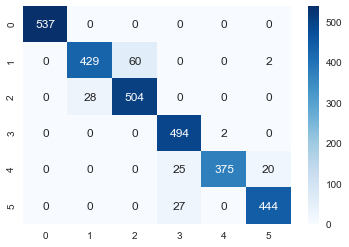

In [118]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

SVM = svm.SVC()

parameters = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(1, 10)
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_3std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

# parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
# }
# grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
# grid_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.0min finished


The train score: 0.9933351468988031 with parameters: {'C': 0.4001907324639531}
The accuracy of  Linear Support Vector Classification is:  0.9623345775364778
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       538
           SITTING       0.86      0.97      0.91       435
          STANDING       0.98      0.89      0.93       581
           WALKING       1.00      0.95      0.97       522
WALKING_DOWNSTAIRS       0.98      1.00      0.99       411
  WALKING_UPSTAIRS       0.96      0.98      0.97       460

       avg / total       0.96      0.96      0.96      2947

Running for 65.25136399269104 seconds


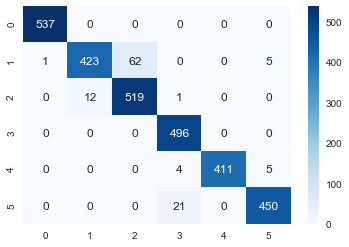

In [121]:
start_time = time.time()

SVM = LinearSVC()

parameters = {
    "C": uniform(0.01, 10)
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_3std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

# parameters ={
#     'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#     'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#     'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
#     'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
#     'multi_class'  : ['ovr','crammer_singer'],
#     'random_state' : [42],
#     'tol' : [1e-4],
#     'max_iter' : [1000],
# }

# grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
# grid_search_cv.fit(features_train_3std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Nu-Support Vector Classification with XGBoost 3 sd (473 features)

In [ ]:
start_time = time.time()

SVM = NuSVC()

parameters = {
    "nu": uniform(0.001, 0.5)
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_3std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
# parameters = {
#     'nu': [0.001,0.0025,0.005,0.0075,0.1], #other larger nu values is "not fleasible"
#     'kernel': ['linear','poly','rbf'],
#     'degree': [2,3,4,5,6],
#     'gamma': [1e-5,1e-4,1e-3,1e-2,'auto'],
#     'tol' : [1e-4],
#     'decision_function_shape' : ['ovo','ovr'],

# }

# grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
# grid_search_cv.fit(features_train_3std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min


## Special Feature Selection

### C-Support Vector Classification with balanced class weight and XGBoost 2 sd (165 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished


The train score: 0.9759249183895539 with parameters: {'class_weight': 'balanced'}
The accuracy of  C-Support Vector Classification is:  0.9321343739395996
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.89      0.88       476
          STANDING       0.91      0.88      0.90       545
           WALKING       1.00      0.88      0.94       559
WALKING_DOWNSTAIRS       0.90      0.99      0.94       380
  WALKING_UPSTAIRS       0.92      0.96      0.94       450

       avg / total       0.93      0.93      0.93      2947

Running for 12.754354000091553 seconds


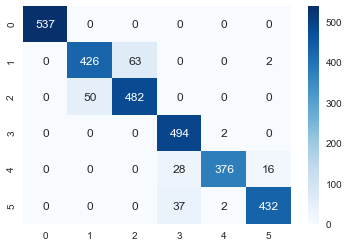

In [18]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

SVM = svm.SVC()

# parameters = {
#     
#     "C": uniform(1, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_2std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_2std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_2std)

parameters ={
#     'C': [0.1,0.5,1.0,2.0, 3.0, 5.0, 7.5],
#     'kernel': ['linear','poly','rbf'],
#     'degree': [2,3,4,5,6],
#     'gamma': [1e-4,1e-3,1e-2,1e-1,'auto'],
#     'tol' : [1e-4],
#     'decision_function_shape' : ['ovo','ovr'],
    'class_weight' : ['balanced'],
}
grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf = pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear-Support Vector Classification with balanced class weight and XGBoost 2 sd (165 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished


The train score: 0.9908868335146899 with parameters: {'class_weight': 'balanced'}
The accuracy of  Linear Support Vector Classification is:  0.9558873430607397
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.96      0.91       440
          STANDING       0.97      0.89      0.93       578
           WALKING       0.99      0.94      0.96       524
WALKING_DOWNSTAIRS       0.97      0.99      0.98       413
  WALKING_UPSTAIRS       0.94      0.97      0.96       455

       avg / total       0.96      0.96      0.96      2947

Running for 3.4554409980773926 seconds


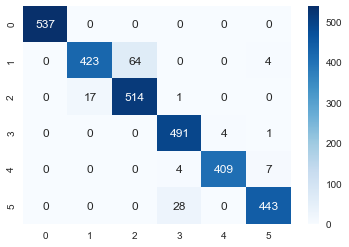

In [19]:
start_time = time.time()

SVM = LinearSVC()

# parameters = {
#     "C": uniform(0.01, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

parameters ={
#    'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#    'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#    'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
#    'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
#    'multi_class'  : ['ovr','crammer_singer'],
#    'random_state' : [42],
#    'tol' : [1e-3],
#    'max_iter' : [1000],
    'class_weight' : ['balanced'],
}

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf = pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear-Support Vector Classification with custom parameters and XGBoost 2 sd (165 features)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.0s finished


The train score: 0.9884385201305768 with parameters: {'C': 0.1, 'max_iter': 1000, 'multi_class': 'ovr', 'random_state': 42, 'tol': 0.001}
The accuracy of  Linear Support Vector Classification is:  0.9579233118425518
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.95      0.91       447
          STANDING       0.96      0.89      0.92       571
           WALKING       1.00      0.95      0.97       520
WALKING_DOWNSTAIRS       0.97      0.99      0.98       411
  WALKING_UPSTAIRS       0.96      0.98      0.97       461

       avg / total       0.96      0.96      0.96      2947

Running for 10.331475019454956 seconds


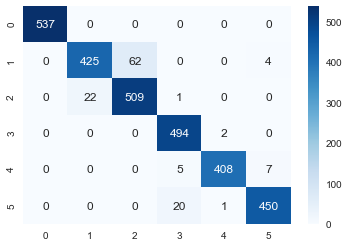

In [21]:
start_time = time.time()

SVM = LinearSVC()

# parameters = {
#     "C": uniform(0.01, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

parameters ={
#    'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#    'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#    'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
    'C': [0.1,0.5,0.8,1.0,1.2, 2.0, 5.0, 10.0],
    'multi_class'  : [
        'ovr',
#        'crammer_singer'
    ],
    'random_state' : [42],
    'tol' : [1e-3],
    'max_iter' : [1000],
}

grid_search_cv = GridSearchCV(SVM, parameters, cv=3,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear-Support Vector Classification with custom parameters and XGBoost 3 sd (473 features)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   19.5s finished


The train score: 0.9915669205658324 with parameters: {'C': 0.1, 'max_iter': 1000, 'multi_class': 'ovr', 'random_state': 42, 'tol': 0.001}
The accuracy of  Linear Support Vector Classification is:  0.9616559212758737
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       538
           SITTING       0.87      0.97      0.92       440
          STANDING       0.97      0.90      0.93       576
           WALKING       1.00      0.94      0.97       526
WALKING_DOWNSTAIRS       0.98      1.00      0.99       410
  WALKING_UPSTAIRS       0.95      0.98      0.96       457

       avg / total       0.96      0.96      0.96      2947

Running for 24.222471952438354 seconds


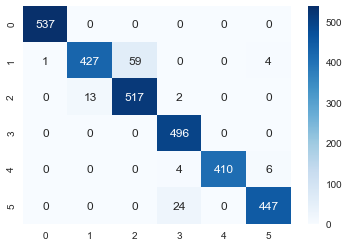

In [23]:
start_time = time.time()

SVM = LinearSVC()

# parameters = {
#     "C": uniform(0.01, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

parameters ={
#    'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#    'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#    'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
    'C': [0.1,0.3, 0.35, 0.4, 0.45, 0.5, 0.8,1.0],
    'multi_class'  : [
        'ovr',
#        'crammer_singer'
    ],
    'random_state' : [42],
    'tol' : [1e-3],
    'max_iter' : [1000],
}

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear-Support Vector Classification with custom parameters and XGBoost 2.5 sd (342 features)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.4s finished


The train score: 0.9936071817192601 with parameters: {'C': 0.35, 'multi_class': 'ovr', 'random_state': 42, 'tol': 0.001}
The accuracy of  Linear Support Vector Classification is:  0.9633525619273838
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       538
           SITTING       0.86      0.97      0.91       434
          STANDING       0.98      0.89      0.93       582
           WALKING       1.00      0.96      0.98       518
WALKING_DOWNSTAIRS       0.98      1.00      0.99       412
  WALKING_UPSTAIRS       0.96      0.98      0.97       463

       avg / total       0.97      0.96      0.96      2947

Running for 11.541373014450073 seconds


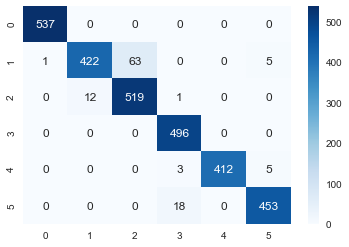

In [52]:
start_time = time.time()

SVM = LinearSVC()

# parameters = {
#     "C": uniform(0.01, 10)
# }

# rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
# rnd_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
# print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
# pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

parameters ={
#    'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#    'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#    'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
    'C': [0.3, 0.35, 0.4, 0.45, 0.5],
    'multi_class'  : [
        'ovr',
#        'crammer_singer'
    ],
    'random_state' : [42],
    'tol' : [1e-3],
    'max_iter' : [1000],
#    'class_weight' : ['balanced'],
}

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2_5std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2_5std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2_5std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

### Linear-Support Vector Classification with best parameters and XGBoost 2.5 sd (342 features)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished


The train score: 0.9936071817192601 with parameters: {'C': 0.35, 'max_iter': 1000, 'multi_class': 'ovr', 'random_state': 42, 'tol': 0.001}
The accuracy of  Linear Support Vector Classification is:  0.9633525619273838
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       538
           SITTING       0.86      0.97      0.91       434
          STANDING       0.98      0.89      0.93       582
           WALKING       1.00      0.96      0.98       518
WALKING_DOWNSTAIRS       0.98      1.00      0.99       412
  WALKING_UPSTAIRS       0.96      0.98      0.97       463

       avg / total       0.97      0.96      0.96      2947

Running for 5.582199811935425 seconds


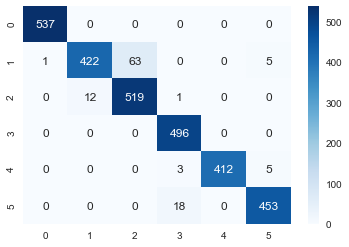

In [19]:
start_time = time.time()

SVM = LinearSVC()

parameters ={
#    'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#    'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#    'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
    'C': [0.35],
    'multi_class'  : [
        'ovr',
    ],
    'random_state' : [42],
    'tol' : [0.001],
    'max_iter' : [1000],
#    'class_weight' : ['balanced'],
}

grid_search_cv = GridSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2_5std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2_5std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2_5std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))